In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().resolve().parent  # parent of notebooks/
sys.path.append(str(project_root))

from src.train import ModelTrainer
from src.predict import ModelPredictor

from src.utils.helpers import load_raw_data
from src.config.config import Config

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd




In [2]:
# Load the raw CSV file
data_path = Config.DATA_DIR/ "processed"/ "customer_features__with_target.csv"
df_modeling = load_raw_data(data_path)
df_modeling.head()


,Amount_sum,Amount_mean,Amount_count,Amount_std,transactionid_transactionid_76871_ratio,transactionid_transactionid_73770_ratio,transactionid_transactionid_26203_ratio,batchid_batchid_67019_ratio,batchid_batchid_51870_ratio,batchid_batchid_113893_ratio,...,productcategory_airtime_ratio,productcategory_utility_bill_ratio,channelid_channelid_3_ratio,channelid_channelid_2_ratio,channelid_channelid_5_ratio,CustomerId,recency,frequency,monetary,is_high_risk
0,-0.066891,-0.153364,-0.253459,-0.095504,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,1.000000,0.0,CustomerId_1,84,1,10000,1
1,-0.066891,-0.153364,-0.253459,-0.095504,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.000000,1.000000,0.0,CustomerId_10,84,1,10000,1
2,-0.055849,-0.069870,-0.212186,-0.083421,0.0,0.0,0.0,0.0,0.0,0.0,...,0.400000,0.0,0.600000,0.400000,0.0,CustomerId_1001,90,5,30400,1
3,-0.061655,-0.091435,-0.150278,-0.145414,0.0,0.0,0.0,0.0,0.0,0.0,...,0.454545,0.0,0.454545,0.545455,0.0,CustomerId_1002,26,11,4775,0
4,-0.055849,-0.073846,-0.201868,-0.088882,0.0,0.0,0.0,0.0,0.0,0.0,...,0.500000,0.0,0.666667,0.333333,0.0,CustomerId_1003,12,6,32000,0


In [3]:
print(df_modeling.columns)

Index(['Amount_sum', 'Amount_mean', 'Amount_count', 'Amount_std',
       'transactionid_transactionid_76871_ratio',
       'transactionid_transactionid_73770_ratio',
       'transactionid_transactionid_26203_ratio',
       'batchid_batchid_67019_ratio', 'batchid_batchid_51870_ratio',
       'batchid_batchid_113893_ratio', 'accountid_accountid_4841_ratio',
       'accountid_accountid_4249_ratio', 'accountid_accountid_4840_ratio',
       'subscriptionid_subscriptionid_3829_ratio',
       'subscriptionid_subscriptionid_4429_ratio',
       'subscriptionid_subscriptionid_1372_ratio',
       'customerid_customerid_7343_ratio', 'customerid_customerid_3634_ratio',
       'customerid_customerid_647_ratio', 'currencycode_ugx_ratio',
       'providerid_providerid_4_ratio', 'providerid_providerid_6_ratio',
       'providerid_providerid_5_ratio', 'productid_productid_6_ratio',
       'productid_productid_3_ratio', 'productid_productid_10_ratio',
       'productcategory_financial_services_ratio',
  

In [4]:
trainer = ModelTrainer(data_path=data_path, random_state=42, save_dir=Config.models_dir)
trainer.load_data()


2025-12-16 10:25:30,290 [INFO] Model save directory ready: C:\Users\amare\Documents\KAIM\week-4\credit-risk-model\models
2025-12-16 10:25:30,328 [INFO] Data loaded from C:\Users\amare\Documents\KAIM\week-4\credit-risk-model\data\processed\customer_features__with_target.csv
2025-12-16 10:25:30,340 [INFO] Train-test split completed


In [5]:
trainer.train_models()


2025-12-16 10:25:44,574 [INFO] RF best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
2025-12-16 10:25:44,715 [INFO] LR best params: {'classifier__C': 1}


In [6]:
trainer.models

{'RandomForest': RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                        random_state=42),
 'LogisticRegression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('classifier',
                  LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                     random_state=42))])}

In [7]:
trainer.evaluate_and_log()


c:\Users\amare\Documents\KAIM\week-4\credit-risk-model\.venv\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:177: FutureWarning: The filesystem tracking backend (e.g., './mlruns') will be deprecated in February 2026. Consider transitioning to a database backend (e.g., 'sqlite:///mlflow.db') to take advantage of the latest MLflow features. See https://github.com/mlflow/mlflow/issues/18534 for more details and migration guidance.
  return FileStore(store_uri, store_uri)
2025/12/16 10:26:00 INFO mlflow.tracking.fluent: Experiment with name 'HighRisk_Model_Comparison' does not exist. Creating a new experiment.
2025/12/16 10:26:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025-12-16 10:26:12,031 [INFO] RandomForest metrics: {'accuracy': 0.9959946595460614, 'precision': 0.9964788732394366, 'recall': 0.9929824561403509, 'f1': 0.9947275922671354, 'roc_auc': 0.9999092558983665}
2025/12/16 10:26:12 WARNING mlflow.models.model: `artifact_p

In [8]:
results = {}
for name, model in trainer.models.items():
    y_pred = model.predict(trainer.X_test)
    y_prob = model.predict_proba(trainer.X_test)[:, 1]
    results[name] = {
        'accuracy': accuracy_score(trainer.y_test, y_pred),
        'precision': precision_score(trainer.y_test, y_pred),
        'recall': recall_score(trainer.y_test, y_pred),
        'f1_score': f1_score(trainer.y_test, y_pred),
        'roc_auc': roc_auc_score(trainer.y_test, y_prob)
    }


                model  accuracy  precision    recall  f1_score   roc_auc
0        RandomForest  0.995995   0.996479  0.992982  0.994728  0.999909
1  LogisticRegression  0.987984   0.975862  0.992982  0.984348  0.999819


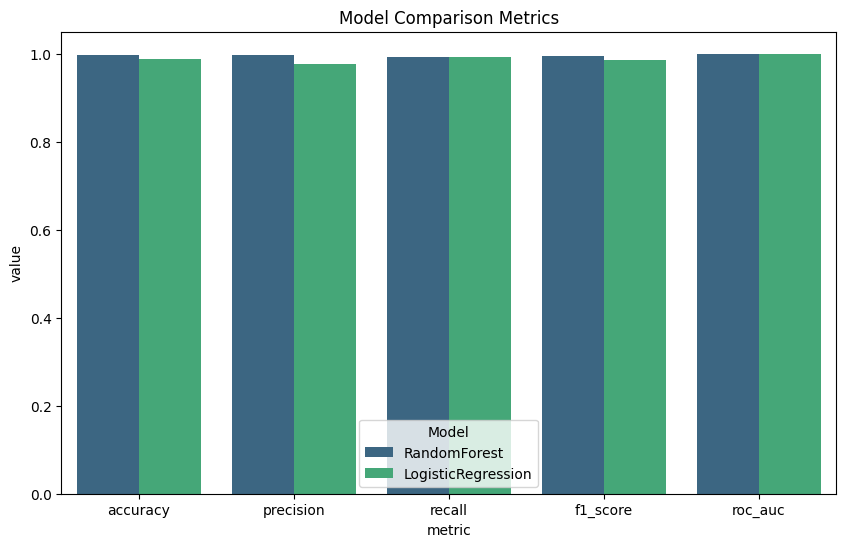

In [9]:
metrics_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "model"})
print(metrics_df)

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
plt.figure(figsize=(10, 6))
metrics_df_melted = metrics_df.melt(id_vars='model', value_vars=metrics_to_plot,
                                    var_name='metric', value_name='value')

sns.barplot(x='metric', y='value', hue='model', data=metrics_df_melted, palette='viridis')
plt.title("Model Comparison Metrics")
plt.ylim(0, 1.05)
plt.legend(title='Model')
plt.show()


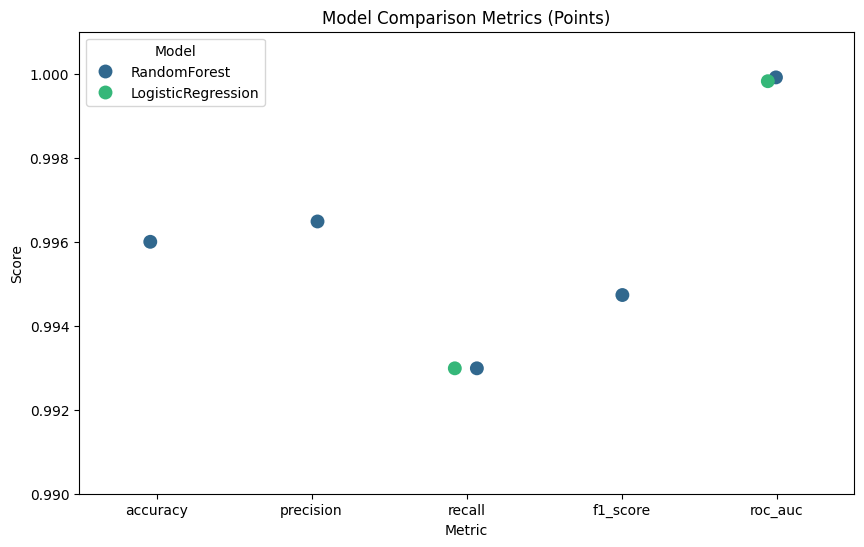

In [10]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='metric', y='value', hue='model', data=metrics_df_melted,
              jitter=True, size=10, palette='viridis')
plt.title("Model Comparison Metrics (Points)")
plt.ylim(0.99, 1.001)
plt.ylabel("Score")
plt.xlabel("Metric")
plt.legend(title='Model')
plt.show()


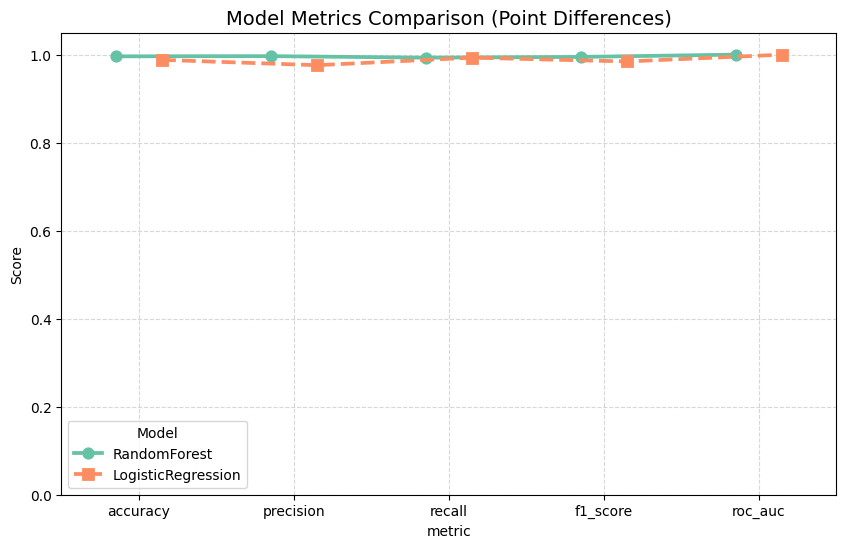

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt for plotting
metrics_melted = metrics_df.melt(id_vars="model", var_name="metric", value_name="value")

plt.figure(figsize=(10,6))
sns.pointplot(x="metric", y="value", hue="model", data=metrics_melted, dodge=0.3, markers=["o","s"], linestyles=["-", "--"], palette="Set2")

plt.title("Model Metrics Comparison (Point Differences)", fontsize=14)
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Model")
plt.show()


In [12]:
# Check available models in the trainer
trainer.models.keys()


dict_keys(['RandomForest', 'LogisticRegression'])

In [13]:
import joblib
best_model = joblib.load(Config.models_dir/"best_model.pkl")
y_pred = best_model.predict(trainer.X_test)


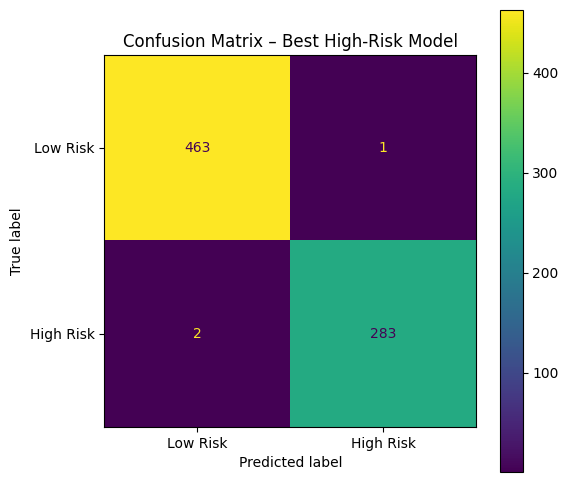

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay


fig, ax = plt.subplots(figsize=(6, 6))

ConfusionMatrixDisplay.from_predictions(
    trainer.y_test,
    y_pred,
    display_labels=["Low Risk", "High Risk"],
    ax=ax
)

ax.set_title("Confusion Matrix – Best High-Risk Model")
plt.show()


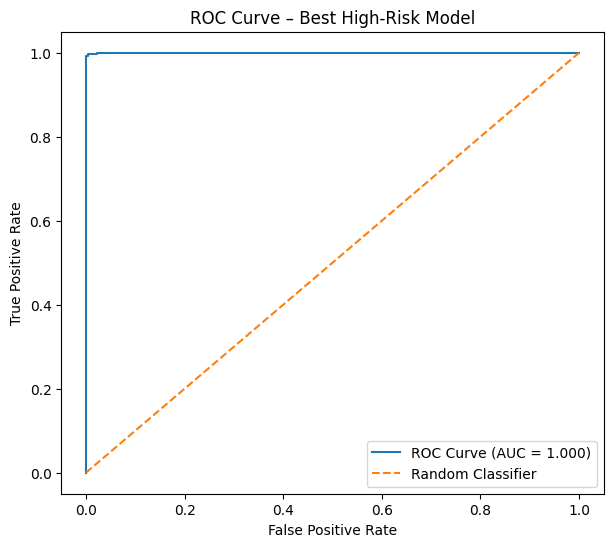

In [16]:
from sklearn.metrics import roc_curve, auc


y_prob = best_model.predict_proba(trainer.X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(trainer.y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(7, 6))

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Best High-Risk Model")
plt.legend(loc="lower right")

plt.show()


In [17]:
# Use RandomForest as example

model_path = Config.models_dir
output_path = Config.DATA_DIR / "processed"

predictor = ModelPredictor(
    model_path=model_path/"best_model.pkl",
    data_path=data_path
)
predictor.load_data()
predictor.load_model()
predictor.predict()
predictor.save_predictions(output_path= output_path/"predictions_demo.csv")


2025-12-16 10:37:09,447 [INFO] Data loaded successfully from C:\Users\amare\Documents\KAIM\week-4\credit-risk-model\data\processed\customer_features__with_target.csv
2025-12-16 10:37:09,520 [INFO] Model loaded successfully from C:\Users\amare\Documents\KAIM\week-4\credit-risk-model\models\best_model.pkl
2025-12-16 10:37:09,590 [INFO] Predictions generated successfully.
2025-12-16 10:37:09,736 [INFO] Predictions saved to C:\Users\amare\Documents\KAIM\week-4\credit-risk-model\data\processed\predictions_demo.csv


In [18]:
import pandas as pd
data_path = Config.DATA_DIR / "processed"
pred_df = pd.read_csv(data_path/"predictions_demo.csv")
pred_df[['CustomerId', 'predicted_risk', 'predicted_risk_prob']].head()


,CustomerId,predicted_risk,predicted_risk_prob
0,CustomerId_1,1,0.989479
1,CustomerId_10,1,0.994041
2,CustomerId_1001,1,0.983250
3,CustomerId_1002,0,0.066692
4,CustomerId_1003,0,0.017636


2025-12-16 10:37:18,829 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\amare\AppData\Local\Temp\ipykernel_3416\2631985977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_risk', data=pred_df, palette='coolwarm', ax=ax)
2025-12-16 10:37:18,848 [INFO] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


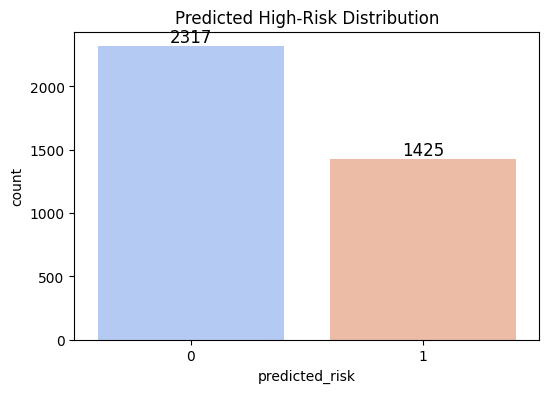

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x='predicted_risk', data=pred_df, palette='coolwarm', ax=ax)
ax.set_title("Predicted High-Risk Distribution")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom", fontsize=12)
plt.show()
